In [170]:
#File for Python-API - WeatherPY

import pandas as pd
import random as random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from citipy import citipy
import requests
import json
%matplotlib inline

# Get API key(s)

from config import wkey

In [171]:
# Base URL
                                                                                              
url = "http://api.openweathermap.org/data/2.5/weather?"
                                                                                               

In [172]:
#plotting routine
def plotter(x1,y1,x2,y2,Data):
   
    #plotting temperature vs latitude for both Northern and Southern Hemisphere
    #includes plotting regression values

    (slope_N, intercept_N, rvalue_N, pvalue_N, stderr_N) = linregress(x1,y1)
    regress_values_N = x1 * slope_N + intercept_N
    line_eq = "y = " + str(round(slope_N,2)) + "x + " + str(round(intercept_N,2))+", r = " +str(round(rvalue_N,2))
    max_y = y1.max()
    min_x = x1.min()
    fig = plt.figure(figsize = (15,4))
    ax1 = fig.add_subplot(121)
    ax1.scatter(x1, y1, s=5)
    plt.plot(x1,regress_values_N,"r-")
    plt.annotate(line_eq,(min_x+1,max_y-1),fontsize=11,color="red") #writes to coordinates on graph
    plt.xlabel("Latitude (degrees)")
    plt.ylabel(f"{Data}")
    plt.title(f"{Data} vs Latitude \n for Northern Hemisphere")


    (slope_S, intercept_S, rvalue_S, pvalue_S, stderr_S) = linregress(x2,y2)
    regress_values_S = x2 * slope_S + intercept_S
    line_eq = "y = " + str(round(slope_S,2)) + "x + " + str(round(intercept_S,2))+", r = " +str(round(rvalue_S,2))
    max_y = y2.max()
    min_x = x2.min()
    #plotting second data set
    ax2 = fig.add_subplot(122)
    ax2.scatter(x2, y2, s=5)
    plt.plot(x2,regress_values_S,"r-")
    plt.annotate(line_eq,(min_x+1,max_y-1),fontsize=11,color="red") #writes to coordinates on graph
    plt.xlabel("Latitude (degrees)")
    plt.ylabel(f"{Data}")
    plt.title(f"{Data} vs Latitude \n for Southern Hemisphere")
    plt.show()


    Result_Temp_df = pd.DataFrame({"Slope":[slope_N, slope_S], "Intercept":[intercept_N, intercept_S], 
                                                         "r-value":[rvalue_N, rvalue_S], "p-value":[pvalue_N, pvalue_S]})

    Result_Temp_df["Hemisphere"] =["Northern", "Southern"]
    Result_Temp_df = Result_Temp_df[["Hemisphere", "Slope", "Intercept", "r-value", "p-value"]]

    print(f"Correlation of {Data} and Latitude in Hemispheres")
    print("")

    print(Result_Temp_df)
    return Result_Temp_df; 

In [173]:
#Creating empty dataframe
weather_summary_df = pd.DataFrame(columns = ["City", "Country", "Lat","Long", "Temp", "Humidity", "%Cloud","Wind_Speed"])
i=0 #counter for number of issues in try
#loop to retrieve data
while len(weather_summary_df)<500+1:
    #generating latitute (-90 to 90) and longitude points (-180 to 180)
    lat_point = round(180*(random.random())-90,4) #range*random(0-1)+offset
    long_point = round(360*(random.random())-180,4)
    
    #using citipy to find nearest city and country code
    city = citipy.nearest_city(lat_point, long_point)
    city_choice = city.city_name
    country_choice = city.country_code
    
    #if to make certain don't pick same city twice
    if city_choice not in weather_summary_df.values:
        
        #establishing query key for openweatherapi
        query_url = f"{url}q={city_choice},{country_choice}&units=metric&appid={wkey}"
        #getting response for url formatted as json
        response = requests.get(query_url).json()
        #inserting exception handling (does seem to happen)
        try:
            temp = response["main"]["temp"]     
            humidity = response["main"]["humidity"]
            clouds = response["clouds"]["all"]
            wind_speed = response["wind"]["speed"]
            #updating dataframe with data
            weather_summary_df = weather_summary_df.append({"City":city_choice, "Country":country_choice, "Lat":lat_point, "Long":long_point, 
                            "Temp":temp, "Humidity":humidity,"%Cloud":clouds,"Wind_Speed":wind_speed}, ignore_index = True)
        except KeyError:
            i+=1
            #print(f"problem with key on loop {i}")  #alert exception happened
            

problem with key on loop 1
problem with key on loop 2
problem with key on loop 3
problem with key on loop 4
problem with key on loop 5
problem with key on loop 6
problem with key on loop 7
problem with key on loop 8
problem with key on loop 9
problem with key on loop 10
problem with key on loop 11
problem with key on loop 12
problem with key on loop 13
problem with key on loop 14
problem with key on loop 15
problem with key on loop 16
problem with key on loop 17
problem with key on loop 18
problem with key on loop 19
problem with key on loop 20
problem with key on loop 21
problem with key on loop 22
problem with key on loop 23
problem with key on loop 24
problem with key on loop 25
problem with key on loop 26
problem with key on loop 27
problem with key on loop 28
problem with key on loop 29
problem with key on loop 30
problem with key on loop 31
problem with key on loop 32
problem with key on loop 33
problem with key on loop 34
problem with key on loop 35
problem with key on loop 36
p

In [175]:
#setting hemisphere's

weather_summary_df.loc[(weather_summary_df["Lat"]>0),"Hemisphere"]="Northern"
weather_summary_df.loc[(weather_summary_df["Lat"]<=0),"Hemisphere"]="Southern"



weather_summary_df.shape

(500, 9)

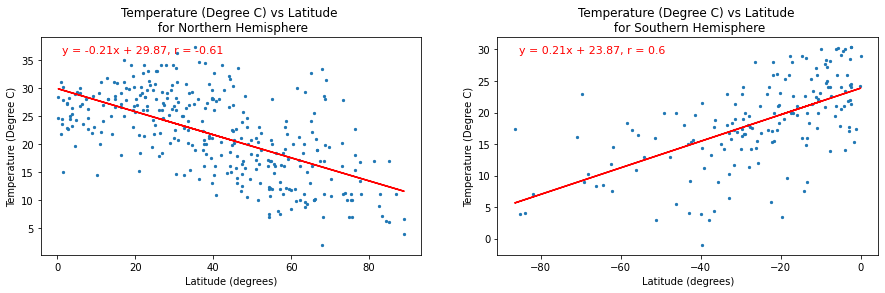

Correlation of Temperature (Degree C) and Latitude in Hemispheres

  Hemisphere     Slope  Intercept   r-value       p-value
0   Northern -0.205655  29.866413 -0.611035  1.817581e-35
1   Southern  0.210588  23.866501  0.598659  1.289880e-17


In [176]:
#TEMPERATURE PLOTS
#Extracting data for latitude and temperature for northern and sourthern hemisphere's
lat_N = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Northern"),"Lat"].astype(float)
temp_N = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Northern"),"Temp"].astype(float)

lat_S = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Southern"),"Lat"].astype(float)
temp_S = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Southern"),"Temp"].astype(float)

Temp_Result_df = []
Param = "Temperature (Degree C)"
Temp_Result_df = plotter(lat_N,temp_N,lat_S,temp_S,Param)


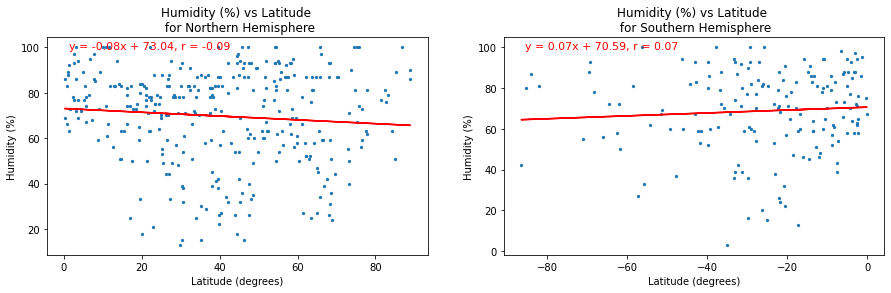

Correlation of Humidity (%) and Latitude in Hemispheres

  Hemisphere     Slope  Intercept   r-value   p-value
0   Northern -0.083268  73.038072 -0.088382  0.107417
1   Southern  0.071049  70.594029  0.068441  0.379489


In [183]:
#Humidity PLOTS
#Extracting data for latitude and humidity for northern and sourthern hemisphere's
lat_N = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Northern"),"Lat"].astype(float)
hum_N = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Northern"),"Humidity"].astype(float)

lat_S = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Southern"),"Lat"].astype(float)
hum_S = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Southern"),"Humidity"].astype(float)

Param = "Humidity (%)"

Hum_Result_df = plotter(lat_N,hum_N,lat_S,hum_S,Param)

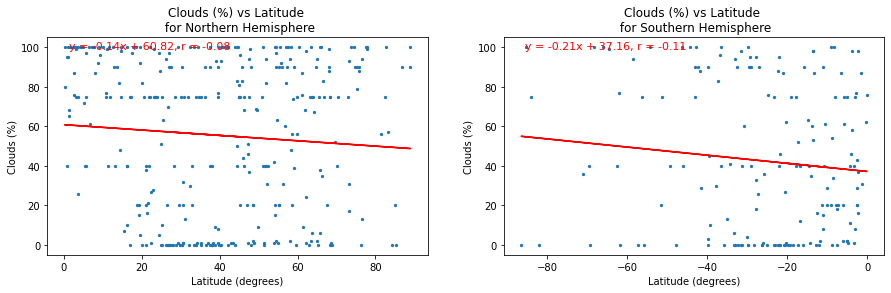

Correlation of Clouds (%) and Latitude in Hemispheres

  Hemisphere     Slope  Intercept   r-value   p-value
0   Northern -0.135610  60.821202 -0.077444  0.158533
1   Southern -0.205779  37.155300 -0.108747  0.161839


In [184]:
#%Clouds PLOTS
#Extracting data for latitude and clouds for northern and sourthern hemisphere's
lat_N = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Northern"),"Lat"].astype(float)
cloud_N = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Northern"),"%Cloud"].astype(float)

lat_S = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Southern"),"Lat"].astype(float)
cloud_S = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Southern"),"%Cloud"].astype(float)

Param = "Clouds (%)"

Hum_Result_df = plotter(lat_N,cloud_N,lat_S,cloud_S,Param)

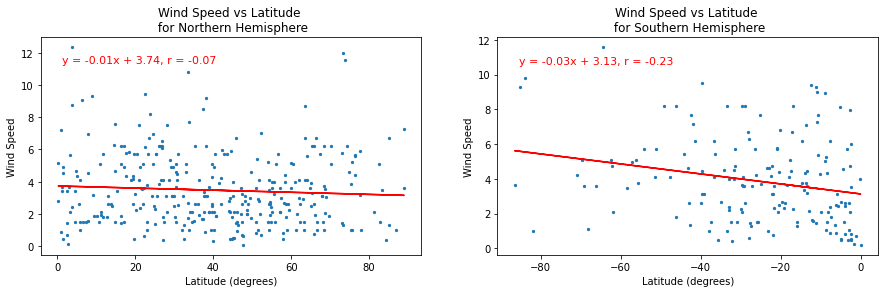

Correlation of Wind Speed and Latitude in Hemispheres

  Hemisphere     Slope  Intercept   r-value   p-value
0   Northern -0.006537   3.736388 -0.065980  0.229831
1   Southern -0.028767   3.132153 -0.230766  0.002697


In [185]:
#Wind_Speed PLOTS
#Extracting data for latitude and clouds for northern and sourthern hemisphere's
lat_N = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Northern"),"Lat"].astype(float)
wind_N = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Northern"),"Wind_Speed"].astype(float)

lat_S = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Southern"),"Lat"].astype(float)
wind_S = weather_summary_df.loc[(weather_summary_df["Hemisphere"]=="Southern"),"Wind_Speed"].astype(float)

Param = "Wind Speed"

Hum_Result_df = plotter(lat_N,wind_N,lat_S,wind_S,Param)